# Exploring Time Series

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')


## Loading Data

In [23]:
# We only read the columns we need, thanks to usecols param
divorce = pd.read_csv('../data/divorces.csv', usecols=['Divorce_date', 'Marriage_duration', 'Date_of_marriage'])

In [24]:
divorce

,Divorce_date,Date_of_marriage,Marriage_duration
0,9/6/06,26/6/00,5.0
1,1/2/00,17/2/77,NaN
2,1/2/05,18/12/75,NaN
3,1/2/06,3/12/87,18.0
4,1/2/06,14/11/98,7.0
...,...,...,...
4918,31/10/12,25/10/08,3.0
4919,31/10/13,26/5/12,1.0
4920,31/10/13,2/6/78,35.0
4921,31/12/12,5/11/79,33.0


## Importing DateTime data 

Datetime data has to be explicitly declared to Pandas

In [25]:
divorce.dtypes

Divorce_date          object
Date_of_marriage      object
Marriage_duration    float64
dtype: object

In [26]:
# Dates can be parsed directly when reading from the filesystem
divorce = pd.read_csv('../data/divorces.csv', parse_dates=['Divorce_date'], usecols=['Divorce_date', 'Marriage_duration', 'Date_of_marriage'])

In [27]:
divorce

,Divorce_date,Date_of_marriage,Marriage_duration
0,2006-09-06,26/6/00,5.0
1,2000-01-02,17/2/77,NaN
2,2005-01-02,18/12/75,NaN
3,2006-01-02,3/12/87,18.0
4,2006-01-02,14/11/98,7.0
...,...,...,...
4918,2012-10-31,25/10/08,3.0
4919,2013-10-31,26/5/12,1.0
4920,2013-10-31,2/6/78,35.0
4921,2012-12-31,5/11/79,33.0


In [28]:
divorce.dtypes

Divorce_date         datetime64[ns]
Date_of_marriage             object
Marriage_duration           float64
dtype: object

In [29]:
# Dates can be parsed as well once the data is loaded into memory
divorce['Date_of_marriage'] = pd.to_datetime(divorce['Date_of_marriage'])

In [30]:
divorce.dtypes

Divorce_date         datetime64[ns]
Date_of_marriage     datetime64[ns]
Marriage_duration           float64
dtype: object

In [31]:
# pd.to_datetime can merge year, moth, day columns into a single brand new datetime one. For this to work, columns have to be named "month", "day", "year"

# The other way around:

divorce['Date_of_marriage_month'] = divorce['Date_of_marriage'].dt.month

In [32]:
divorce['Date_of_marriage_month']

0        6
1        2
2       12
3        3
4       11
        ..
4918    10
4919     5
4920     2
4921     5
4922     8
Name: Date_of_marriage_month, Length: 4923, dtype: int32

## Visualizing patterns over time

In the lineplots, the blue line represents the mean while the lighter blue area represents the confidence interval with 95% of the probability for the population.

<Axes: xlabel='Date_of_marriage_month', ylabel='Marriage_duration'>

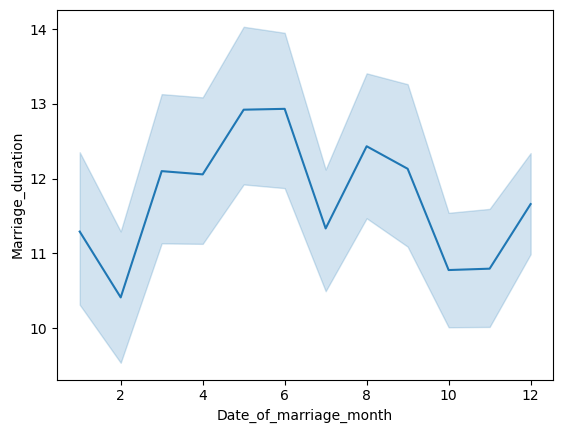

In [33]:
sns.lineplot(data=divorce, x='Date_of_marriage_month', y='Marriage_duration')

## Correlation

Correlation describes the direction and strength of the relationship between two variables

Correlations can help us using variables to predict future outcomes


In [45]:
divorce = pd.read_csv('../data/divorces.csv',             
            usecols=['Divorce_date', 'Marriage_duration', 'Date_of_marriage', 'Num_Children', 'Monthly_income_partner_man_peso', 'Monthly_income_partner_woman_peso'],
            parse_dates=['Divorce_date', 'Date_of_marriage'])

divorce['Date_of_marriage_year'] = divorce['Date_of_marriage'].dt.year

The corr() method calculates the Pearson correlation coefficient, that only pays attention to linear relationships

In [48]:
divorce[['Monthly_income_partner_man_peso',
       'Monthly_income_partner_woman_peso', 'Date_of_marriage_year',
       'Marriage_duration', 'Num_Children']].corr()

,Monthly_income_partner_man_peso,Monthly_income_partner_woman_peso,Date_of_marriage_year,Marriage_duration,Num_Children
Monthly_income_partner_man_peso,1.000000,0.201451,-0.015318,0.029531,-0.009039
Monthly_income_partner_woman_peso,0.201451,1.000000,-0.004419,0.079284,-0.003630
Date_of_marriage_year,-0.015318,-0.004419,1.000000,0.055891,0.098785
Marriage_duration,0.029531,0.079284,0.055891,1.000000,0.480123
Num_Children,-0.009039,-0.003630,0.098785,0.480123,1.000000


It turns out to be very handy to represent the correlation matrix with a heatmap:

<Axes: >

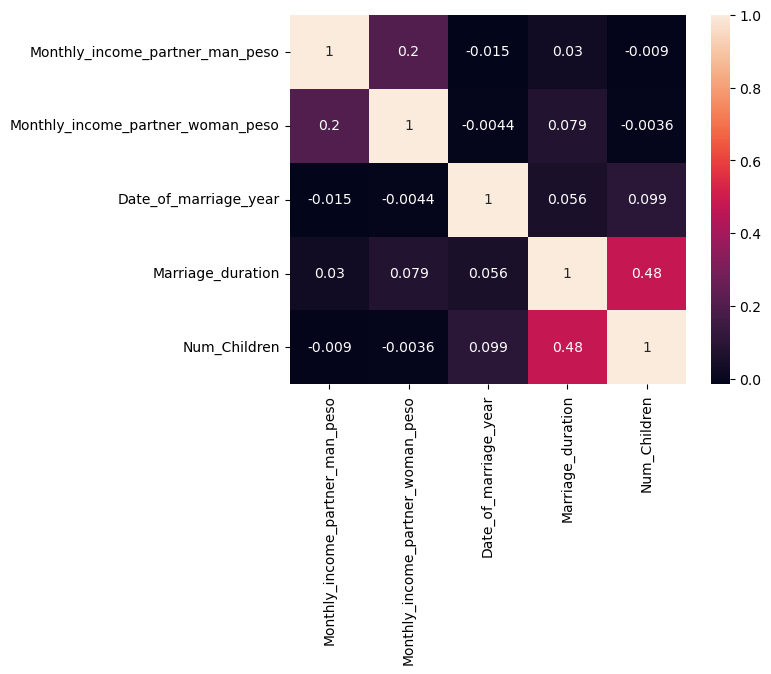

In [47]:
sns.heatmap(divorce[['Monthly_income_partner_man_peso',
       'Monthly_income_partner_woman_peso', 'Date_of_marriage_year',
       'Marriage_duration', 'Num_Children']].corr(), annot=True)

Scatter plots are a very nice complement to our correlation matrix, since there we can see if the relationships between our variables are actually linear or not.

<Axes: xlabel='Monthly_income_partner_man_peso', ylabel='Monthly_income_partner_woman_peso'>

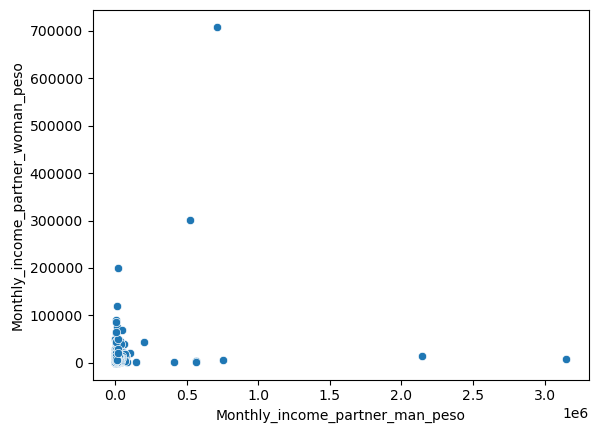

In [49]:
sns.scatterplot(data=divorce, x='Monthly_income_partner_man_peso', y='Monthly_income_partner_woman_peso')

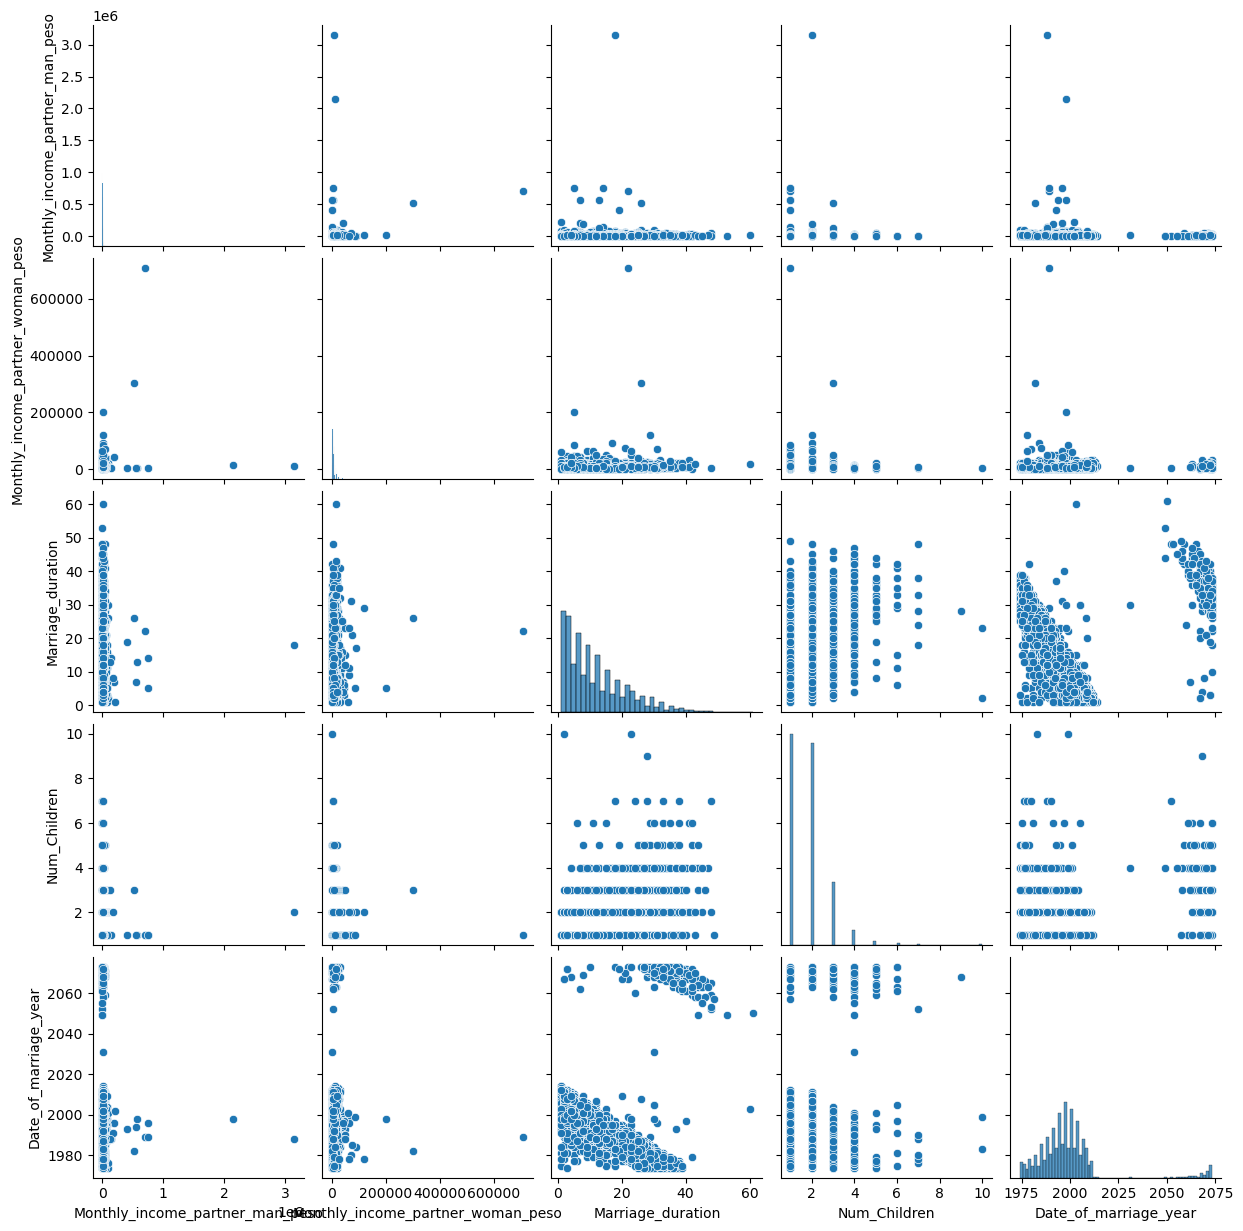

In [53]:
#The pairplot goes beyond scatterplots and shows a scatterplot for each pair or variables in the dataframe
sns.pairplot(data=divorce)

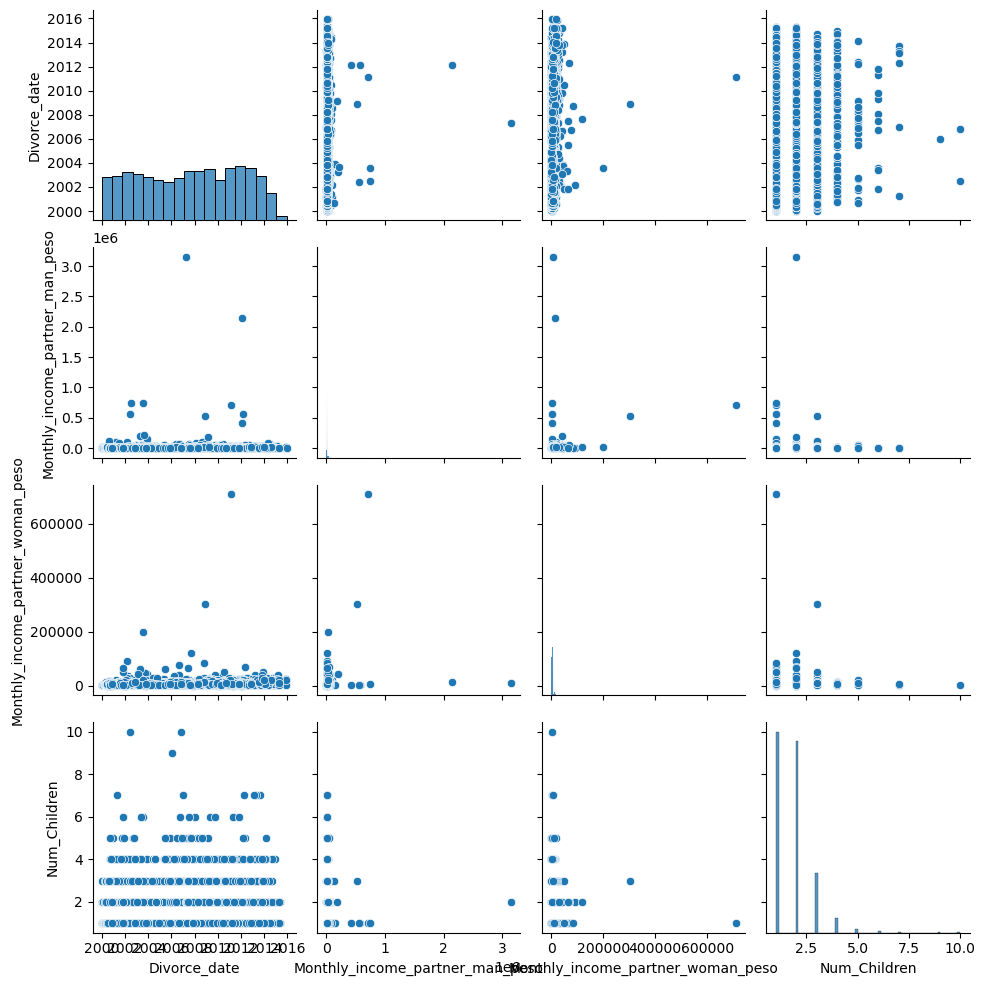

In [54]:
#the vars parameter helps us decluttering the plot
sns.pairplot(data=divorce, vars=['Divorce_date', 'Monthly_income_partner_man_peso',
       'Monthly_income_partner_woman_peso', 'Num_Children'])

## Factor relationships and distributions



In [57]:
divorce = pd.read_csv('../data/divorces.csv',             
            usecols=['Divorce_date', 'Marriage_duration', 'Date_of_marriage', 'Num_Children', 'Monthly_income_partner_man_peso', 'Monthly_income_partner_woman_peso', 'Level_of_education_partner_man', 'Level_of_education_partner_woman'],
            parse_dates=['Divorce_date', 'Date_of_marriage'])

divorce['Date_of_marriage_year'] = divorce['Date_of_marriage'].dt.year

In [55]:
divorce = pd.read_csv('../data/divorces.csv')

In [56]:
divorce.columns

Index(['Divorce_date', 'Type_of_divorce', 'Nationality_partner_man',
       'DOB_partner_man', 'Place_of_birth_partner_man',
       'Birth_municipality_of_partner_man', 'Birth_federal_partner_man',
       'Birth_country_partner_man', 'Age_partner_man',
       'Residence_municipality_partner_man', 'Residence_federal_partner_man',
       'Residence_country_partner_man', 'Monthly_income_partner_man_peso',
       'Occupation_partner_man', 'Place_of_residence_partner_man',
       'Nationality_partner_woman', 'DOB_partner_woman',
       'DOB_registration_date_partner_woman', 'Place_of_birth_partner_woman',
       'Birth_municipality_of_partner_woman', 'Birth_federal_partner_woman',
       'Birth_country_partner_woman', 'Age_partner_woman',
       'Place_of_residence_partner_woman',
       'Residence_municipality_partner_woman',
       'Residence_federal_partner_woman', 'Residence_country_partner_woman',
       'Occupation_partner_woman', 'Monthly_income_partner_woman_peso',
       'Date_of_m

In [58]:
divorce['Level_of_education_partner_man'].value_counts()

Level_of_education_partner_man
PROFESIONAL        2536
PREPARATORIA       1010
SECUNDARIA          692
PRIMARIA            342
SIN ESCOLARIDAD      25
OTRO                 14
Name: count, dtype: int64

<Axes: xlabel='Marriage_duration', ylabel='Count'>

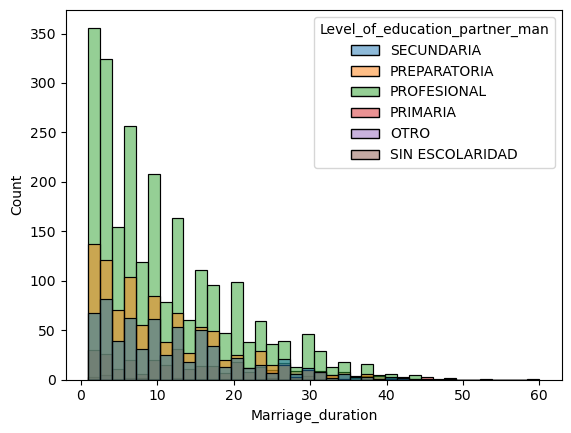

In [60]:
sns.histplot(data=divorce, x='Marriage_duration', hue='Level_of_education_partner_man')

<Axes: xlabel='Marriage_duration', ylabel='Density'>

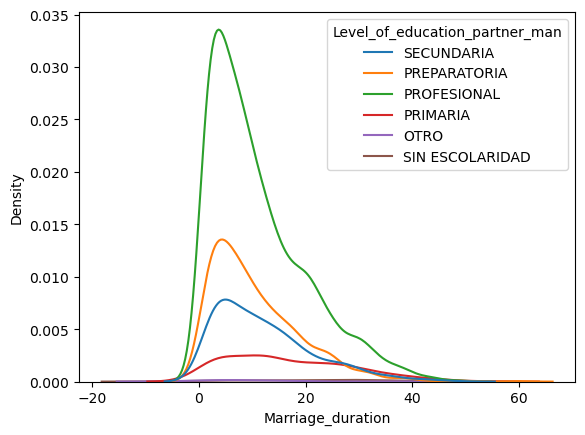

In [61]:
# Kdeplots offer a clearer way to display this kind of information, but keep in mind that there is some smoothing happening here. Its very important to properly parametrize that smoothing
sns.kdeplot(data=divorce, x='Marriage_duration', hue='Level_of_education_partner_man')

<Axes: xlabel='Marriage_duration', ylabel='Density'>

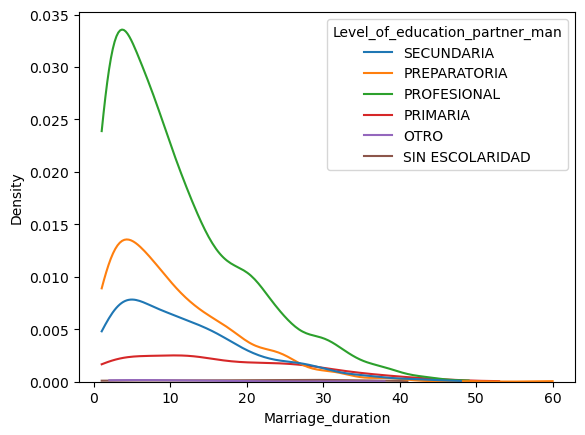

In [62]:
# To avoid showing negative marriage duration we can use the cut parameter
sns.kdeplot(data=divorce, x='Marriage_duration', hue='Level_of_education_partner_man', cut=0)

<Axes: xlabel='Marriage_duration', ylabel='Density'>

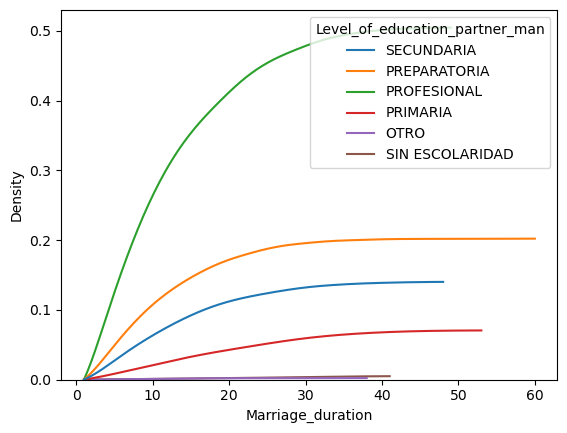

In [63]:
sns.kdeplot(data=divorce, x='Marriage_duration', hue='Level_of_education_partner_man', cut=0, cumulative=True)